In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(5171, 4)

In [8]:
df['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

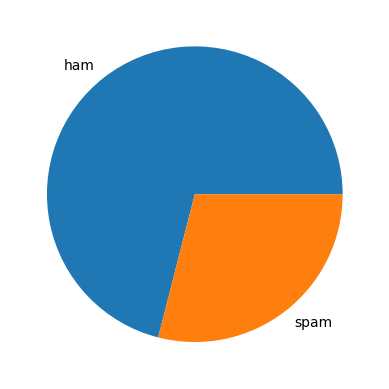

In [9]:
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'])
plt.show()

In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df['char_num'] = df['text'].apply(len)

In [13]:
df.head()

,Unnamed: 0,label,text,label_num,char_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [14]:
df['word'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

In [15]:
df.head()

,Unnamed: 0,label,text,label_num,char_num,word
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,"[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"[Subject, :, hpl, nom, for, january, 9, ,, 200..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,"[Subject, :, photoshop, ,, windows, ,, office,..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,"[Subject, :, re, :, indian, springs, this, dea..."


In [16]:
df['word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Unnamed: 0,label,text,label_num,char_num,word
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [17]:
df['sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Unnamed: 0,label,text,label_num,char_num,word,sentence
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [18]:
#ham
df[df['label_num']==0][['char_num','word','sentence']].describe()

,char_num,word,sentence
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [19]:
#spam
df[df['label_num']==1][['char_num','word','sentence']].describe()

,char_num,word,sentence
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [20]:
import seaborn as sns

<Axes: xlabel='char_num', ylabel='Count'>

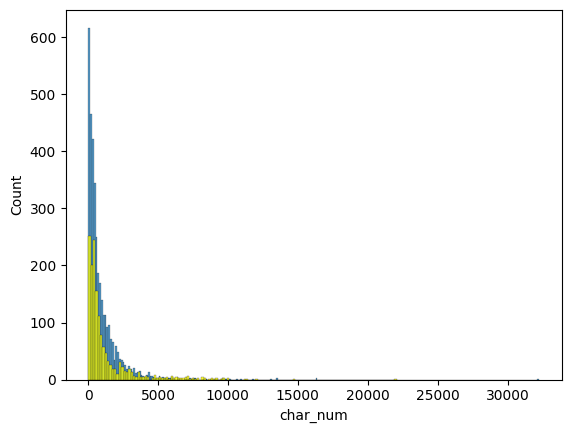

In [21]:
sns.histplot(df[df['label_num']==0]['char_num'])
sns.histplot(df[df['label_num']==1]['char_num'],color='yellow')

<Axes: xlabel='word', ylabel='Count'>

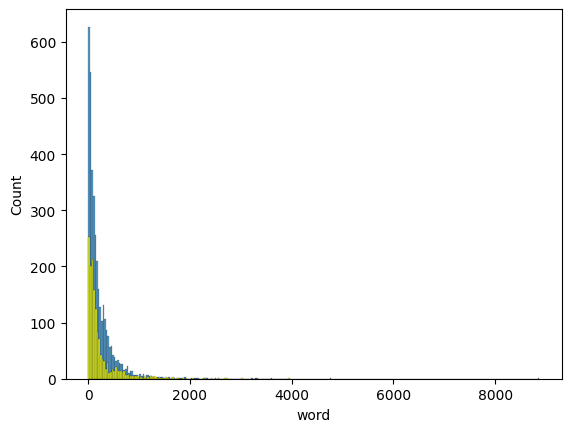

In [22]:
sns.histplot(df[df['label_num']==0]['word'])
sns.histplot(df[df['label_num']==1]['word'],color='yellow')

<Axes: xlabel='sentence', ylabel='Count'>

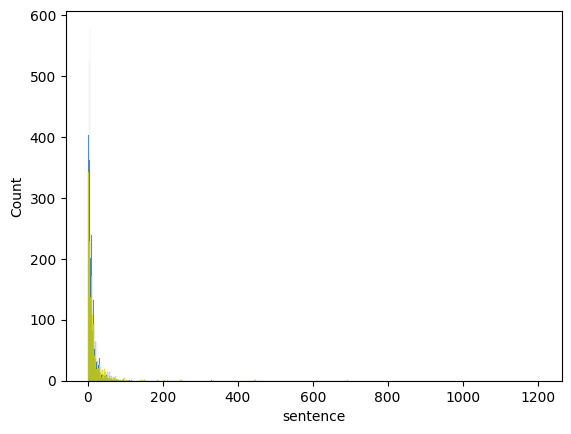

In [23]:
sns.histplot(df[df['label_num']==0]['sentence'])
sns.histplot(df[df['label_num']==1]['sentence'],color='yellow')

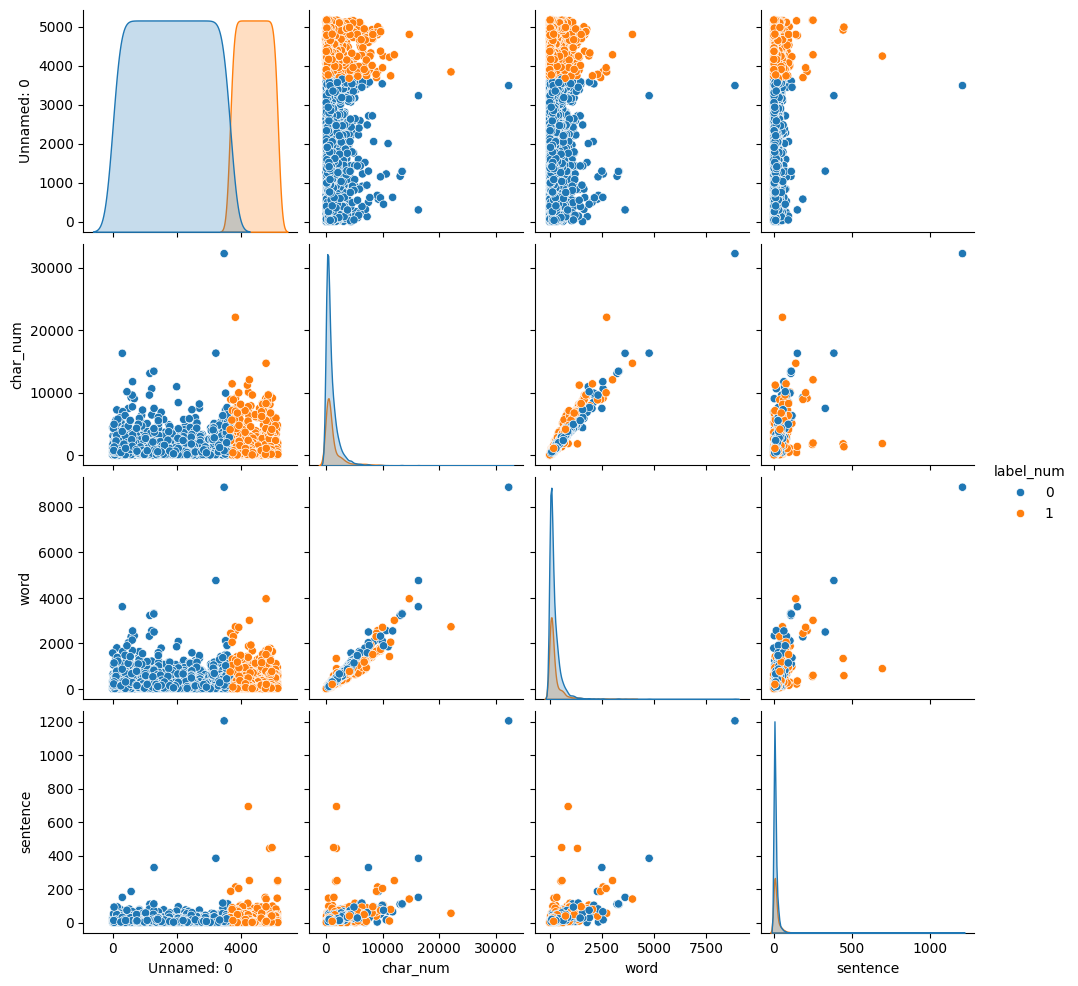

In [24]:
sns.pairplot(df,hue='label_num')

<Axes: >

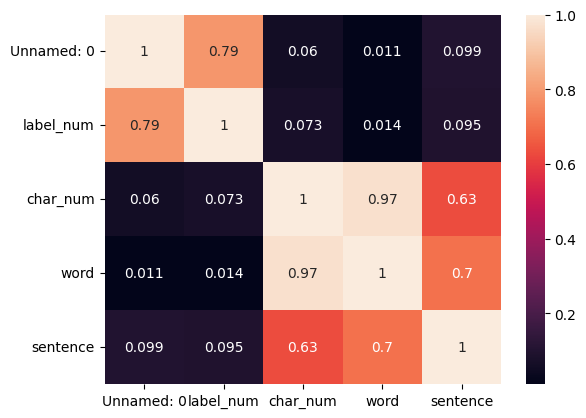

In [25]:
df_numeric = df.select_dtypes(include=["number"])
sns.heatmap(df_numeric.corr(),annot=True)

In [26]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
from nltk.corpus import stopwords
import string

In [28]:
from nltk.stem.porter import PorterStemmer
pst = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(pst.stem(i))


    return " ".join(y)

In [30]:
df['text'].apply(transform_text)

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: text, Length: 5171, dtype: object

In [31]:
df['text_transformed'] = df['text'].apply(transform_text)
df.head()

,Unnamed: 0,label,text,label_num,char_num,word,sentence,text_transformed
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
spam_wc = wc.generate(df[df['label_num']==1]['text_transformed'].str.cat(sep=" "))

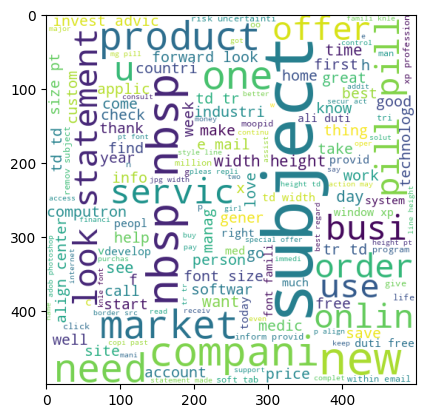

In [34]:
plt.imshow(spam_wc)

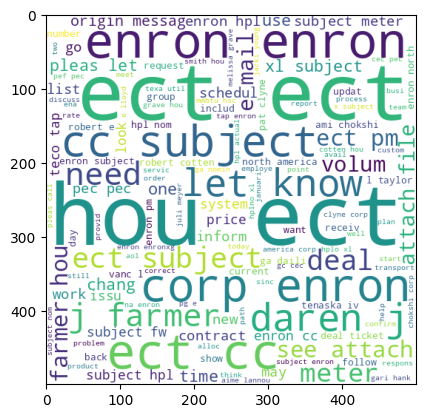

In [35]:
ham_wc = wc.generate(df[df['label_num']==0]['text_transformed'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [36]:
spam_corpus=[]
for txt in df[df['label_num']==1]['text_transformed'].tolist():
  for word in txt.split():
    spam_corpus.append(word)

len(spam_corpus)

197452

In [37]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,subject,1659
1,3,1239
2,com,992
3,http,984
4,compani,918
5,2,858
6,price,732
7,1,720
8,0,698
9,e,638


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'subject'),
  Text(1, 0, '3'),
  Text(2, 0, 'com'),
  Text(3, 0, 'http'),
  Text(4, 0, 'compani'),
  Text(5, 0, '2'),
  Text(6, 0, 'price'),
  Text(7, 0, '1'),
  Text(8, 0, '0'),
  Text(9, 0, 'e'),
  Text(10, 0, 'www'),
  Text(11, 0, '00'),
  Text(12, 0, 'inform'),
  Text(13, 0, 'get'),
  Text(14, 0, 'font'),
  Text(15, 0, 'email'),
  Text(16, 0, '5'),
  Text(17, 0, 'pleas'),
  Text(18, 0, 'td'),
  Text(19, 0, 'secur'),
  Text(20, 0, 'statement'),
  Text(21, 0, '4'),
  Text(22, 0, 'invest'),
  Text(23, 0, 'us'),
  Text(24, 0, 'stock'),
  Text(25, 0, 'product'),
  Text(26, 0, '7'),
  Text(27, 0, 'time'),
  Text(28, 0, 'new'),
  Text(29, 0, 'may')])

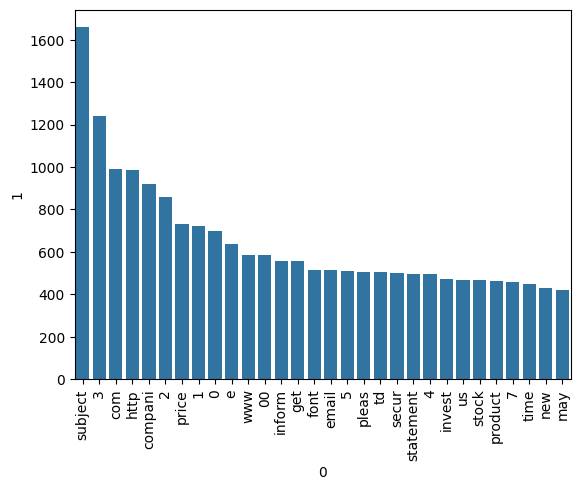

In [38]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [39]:
ham_corpus=[]
for txt in df[df['label_num']==0]['text_transformed'].tolist():
  for word in txt.split():
    ham_corpus.append(word)

len(ham_corpus)

388650

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'ect'),
  Text(1, 0, 'hou'),
  Text(2, 0, 'enron'),
  Text(3, 0, 'subject'),
  Text(4, 0, '2000'),
  Text(5, 0, 'deal'),
  Text(6, 0, 'ga'),
  Text(7, 0, 'pleas'),
  Text(8, 0, 'meter'),
  Text(9, 0, 'com'),
  Text(10, 0, 'cc'),
  Text(11, 0, 'pm'),
  Text(12, 0, 'hpl'),
  Text(13, 0, 'thank'),
  Text(14, 0, '2001'),
  Text(15, 0, '1'),
  Text(16, 0, 'daren'),
  Text(17, 0, '000'),
  Text(18, 0, '00'),
  Text(19, 0, '10'),
  Text(20, 0, 'need'),
  Text(21, 0, '01'),
  Text(22, 0, 'corp'),
  Text(23, 0, '3'),
  Text(24, 0, 'volum'),
  Text(25, 0, 'forward'),
  Text(26, 0, '2'),
  Text(27, 0, 'know'),
  Text(28, 0, 'mmbtu'),
  Text(29, 0, 'e')])

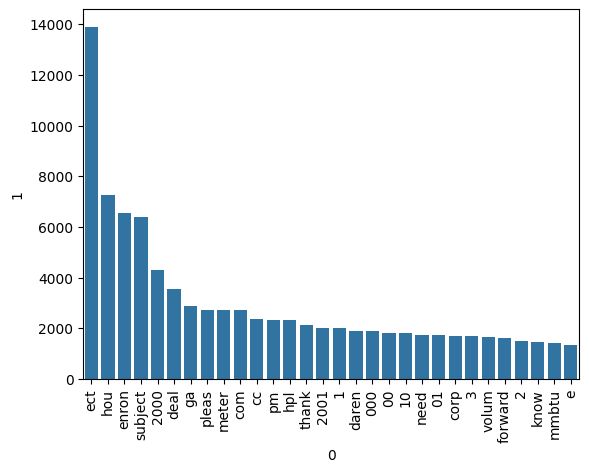

In [40]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfdif = TfidfVectorizer()

In [42]:
X = cv.fit_transform(df['text_transformed']).toarray()

In [43]:
X.shape

(5171, 42592)

In [44]:
y = df['label_num'].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [49]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9719806763285024
[[729  17]
 [ 12 277]]
0.9421768707482994


In [50]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [51]:
#using tfdif
Xt = tfdif.fit_transform(df['text_transformed']).toarray()

In [52]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,y,test_size=0.2,random_state=2)

In [53]:
gnb.fit(Xt_train,yt_train)
y_predt1 = gnb.predict(Xt_test)
print(accuracy_score(yt_test,y_predt1))
print(confusion_matrix(yt_test,y_predt1))
print(precision_score(yt_test,y_predt1))

0.9516908212560387
[[717  29]
 [ 21 268]]
0.9023569023569024


In [ ]:
mnb.fit(Xt_train,yt_train)
y_predt3 = mnb.predict(Xt_test)
print(accuracy_score(yt_test,y_predt3))
print(confusion_matrix(yt_test,y_predt3))
print(precision_score(yt_test,y_predt3))

In [55]:
bnb.fit(Xt_train,yt_train)
y_predt2 = bnb.predict(Xt_test)
print(accuracy_score(yt_test,y_predt2))
print(confusion_matrix(yt_test,y_predt2))
print(precision_score(yt_test,y_predt2))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8367149758454107, 0.7013422818791947)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8367149758454107
Precision -  0.7013422818791947
For  KN
Accuracy -  0.8338164251207729
Precision -  0.6326530612244898
For  NB
Accuracy -  0.9719806763285024
Precision -  0.9421768707482994
For  DT
Accuracy -  0.8521739130434782
Precision -  0.6666666666666666
For  LR
Accuracy -  0.9719806763285024
Precision -  0.9276315789473685
For  RF
Accuracy -  0.9768115942028985
Precision -  0.9431438127090301
For  AdaBoost
Accuracy -  0.9623188405797102
Precision -  0.9084967320261438
For  BgC
Accuracy -  0.9449275362318841
Precision -  0.8945578231292517
For  ETC
Accuracy -  0.9758454106280193
Precision -  0.9342105263157895
For  GBDT
Accuracy -  0.9507246376811594
Precision -  0.8765822784810127
For  xgb
Accuracy -  0.9719806763285024
Precision -  0.9248366013071896


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.976812,0.943144
2,NB,0.971981,0.942177
8,ETC,0.975845,0.934211
4,LR,0.971981,0.927632
10,xgb,0.971981,0.924837
6,AdaBoost,0.962319,0.908497
7,BgC,0.944928,0.894558
9,GBDT,0.950725,0.876582
0,SVC,0.836715,0.701342
3,DT,0.852174,0.666667


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.976812
1,NB,Accuracy,0.971981
2,ETC,Accuracy,0.975845
3,LR,Accuracy,0.971981
4,xgb,Accuracy,0.971981
5,AdaBoost,Accuracy,0.962319
6,BgC,Accuracy,0.944928
7,GBDT,Accuracy,0.950725
8,SVC,Accuracy,0.836715
9,DT,Accuracy,0.852174


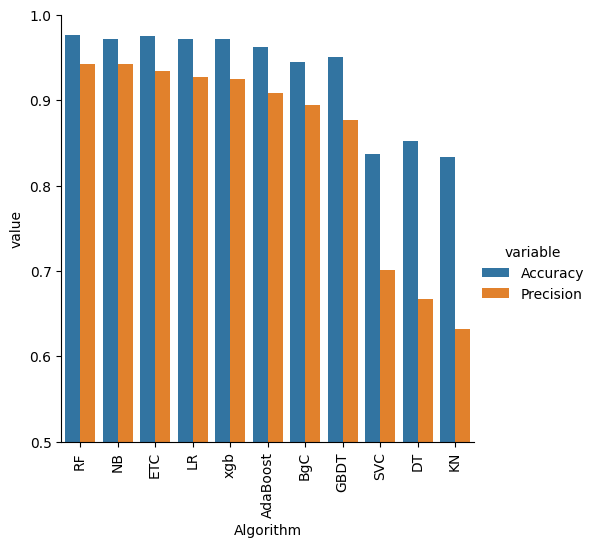

In [64]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [67]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [68]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [70]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.976812,0.943144,0.976812,0.943144,0.976812,0.943144,0.976812,0.943144
1,NB,0.971981,0.942177,0.971981,0.942177,0.971981,0.942177,0.971981,0.942177
2,ETC,0.975845,0.934211,0.975845,0.934211,0.975845,0.934211,0.975845,0.934211
3,LR,0.971981,0.927632,0.971981,0.927632,0.971981,0.927632,0.971981,0.927632
4,xgb,0.971981,0.924837,0.971981,0.924837,0.971981,0.924837,0.971981,0.924837
5,AdaBoost,0.962319,0.908497,0.962319,0.908497,0.962319,0.908497,0.962319,0.908497
6,BgC,0.944928,0.894558,0.944928,0.894558,0.944928,0.894558,0.944928,0.894558
7,GBDT,0.950725,0.876582,0.950725,0.876582,0.950725,0.876582,0.950725,0.876582
8,SVC,0.836715,0.701342,0.836715,0.701342,0.836715,0.701342,0.836715,0.701342
9,DT,0.852174,0.666667,0.852174,0.666667,0.852174,0.666667,0.852174,0.666667


In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [73]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9768115942028985
Precision 0.9553264604810997


In [75]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))